In [1]:
##Import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Read in DTM 
state_dtm = pd.read_csv('state_tweets_dtm.csv')
state_dtm.head()

state  able  academies  access  accessibility  accessible  accomplish  \
0     Alabama     0          0       0              0           0           0   
1      Alaska     0          0       0              0           0           0   
2     Arizona     0          0       0              0           0           0   
3    Arkansas     0          0       0              0           0           0   
4  California     0          0       1              0           0           0   

   according  accounts  action  ...  years  yearslong  yes  yesterdays  york  \
0          0         0       0  ...      0          0    0           0     0   
1          0         0       0  ...      0          0    0           0     0   
2          0         0       0  ...      0          0    0           0     0   
3          0         0       0  ...      0          0    0           0     0   
4          0         0       0  ...      0          0    0           0     0   

   yorks  youre  zero  zoning  zoom  
0      0      0     0       0     0  
1      0      0     0       0     0  
2      0      0     0       0     0  
3      0      0     0       0     0  
4      0      0     0       0     0  

[5 rows x 1579 columns]

In [3]:
#Try sorting by top words, to make a graph
test_sort = state_dtm.sort_values(by = [col for col in state_dtm.columns], ascending = False)
test_sort.head()

state  able  academies  access  accessibility  accessible  \
36     Wyoming     0          0       0              0           0   
35   Wisconsin     0          0       0              0           0   
34  Washington     0          2       1              0           1   
33    Virginia     0          0       0              0           0   
32        Utah     0          0       0              0           0   

    accomplish  according  accounts  action  ...  years  yearslong  yes  \
36           0          0         0       0  ...      0          0    0   
35           0          0         0       0  ...      0          0    0   
34           0          0         0       0  ...      0          0    0   
33           0          0         0       0  ...      0          0    1   
32           0          0         0       0  ...      0          0    0   

    yesterdays  york  yorks  youre  zero  zoning  zoom  
36           0     0      0      0     0       0     0  
35           0     0      0      0     0       0     0  
34           0     0      0      0     0       1     0  
33           0     0      0      0     0       0     0  
32           0     0      0      0     0       0     0  

[5 rows x 1579 columns]

In [4]:
#Try out printing top 5 words mentioned in each state
top_dict = {}
for c in state_dtm.columns:
    top = state_dtm[c].sort_values(ascending = False).head(5)
    top_dict[c] = list(zip(state_dtm.State, top.values))
#top_dict

In [5]:
top_words = pd.DataFrame.from_dict(top_dict, orient = 'index', columns = ['A', 'B', 'C', 'D', 'E']).reset_index()
top_words.head()

index                   A                    B                      C  \
0       State  (Alabama, Wyoming)  (Alaska, Wisconsin)  (Arizona, Washington)   
1      access        (Alabama, 1)          (Alaska, 0)           (Arizona, 0)   
2  accessible        (Alabama, 1)          (Alaska, 0)           (Arizona, 0)   
3   activists        (Alabama, 2)          (Alaska, 0)           (Arizona, 0)   
4    activity        (Alabama, 1)          (Alaska, 0)           (Arizona, 0)   

                      D                   E  
0  (Arkansas, Virginia)  (California, Utah)  
1         (Arkansas, 0)     (California, 0)  
2         (Arkansas, 0)     (California, 0)  
3         (Arkansas, 0)     (California, 0)  
4         (Arkansas, 0)     (California, 0)

In [6]:
state_dtm.head()

State  access  accessible  activists  activity  additional  advance  \
0     Alabama       0           0          0         0           0        0   
1      Alaska       0           0          0         0           0        0   
2     Arizona       0           0          0         0           0        0   
3    Arkansas       0           0          0         0           0        0   
4  California       1           0          0         0           0        0   

   advanced  advocate  affairs  ...  women  won  working  wouldbospoli  wts  \
0         0         0        0  ...      0    0        0             0    0   
1         0         0        0  ...      0    0        0             0    0   
2         0         0        0  ...      0    0        0             0    0   
3         0         0        0  ...      0    0        0             0    0   
4         0         0        0  ...      0    0        0             0    0   

   wyoming  yallbiden  york  zachandmattshow  zeynep  
0        0          0     0                0       0  
1        0          0     0                0       0  
2        0          0     0                0       0  
3        0          0     0                0       0  
4        0          0     0                0       0  

[5 rows x 518 columns]

In [4]:
#Import in corpus to make wordclouds
corpus = pd.read_csv('state_tweets_corpus.csv')
corpus.head()

Unnamed: 0       state                                             tweets
0           0     Alabama  ['ap', 'news', 'latest', 'nzealand', 'mulls', ...
1           1      Alaska  ['tribal', 'transit', 'program', 'makes', 'fun...
2           2     Arizona  ['arizona', 'voted', 'increase', 'taxes', 'wea...
3           3    Arkansas  ['saw', 'story', 'ppl', 'move', 'arkansas', 'd...
4           4  California  ['bold', 'shift', 'roadfocus', 'head', 'public...

In [9]:
alabama_test = corpus.tweets[0]

In [6]:
for i in corpus:
    print(i)

Unnamed: 0
state
tweets


In [7]:
stopwords = set(STOPWORDS)

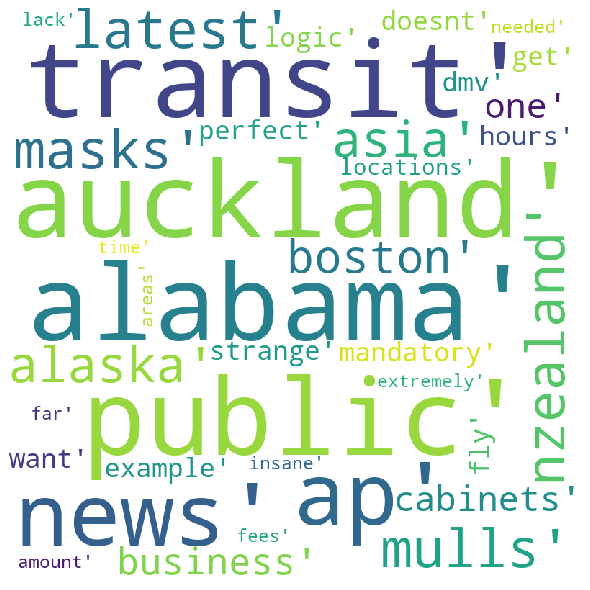

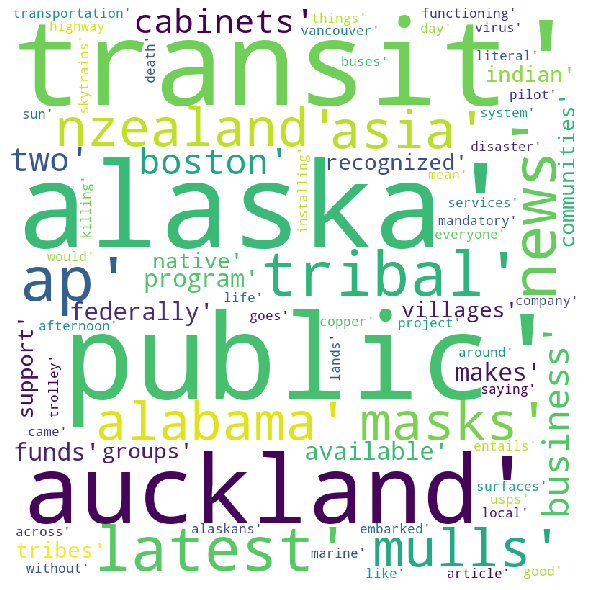

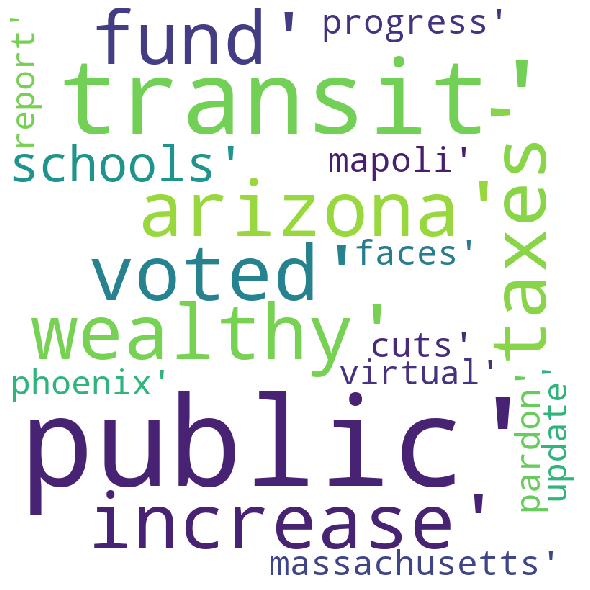

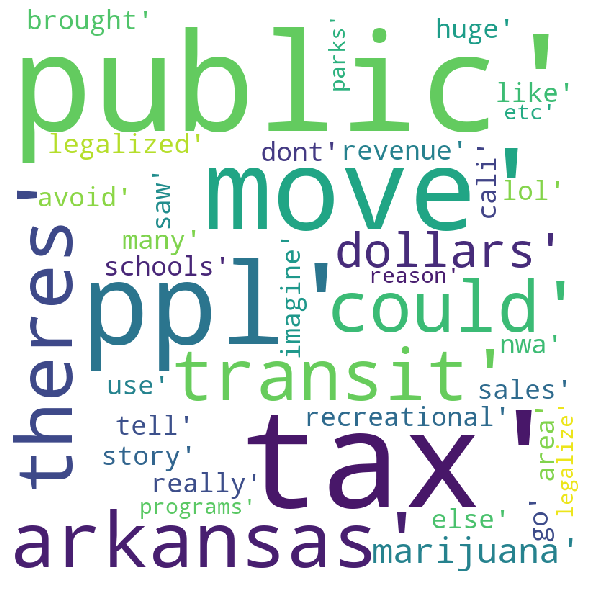

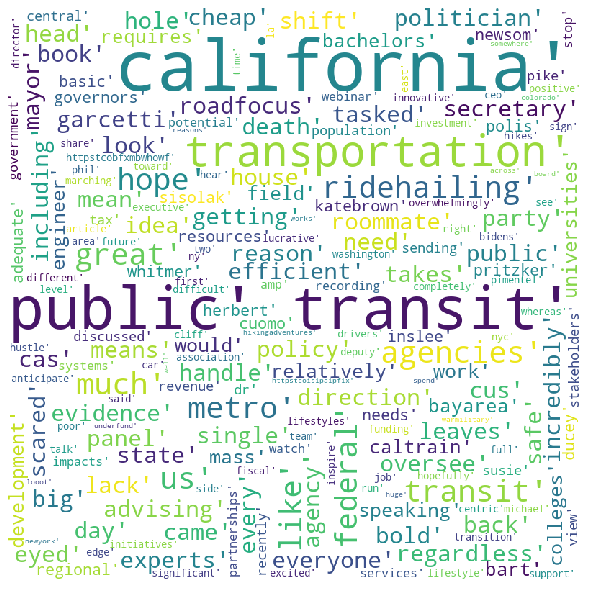

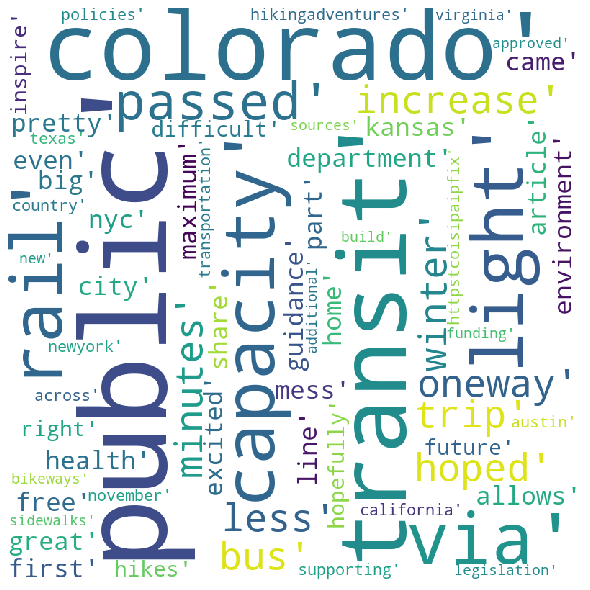

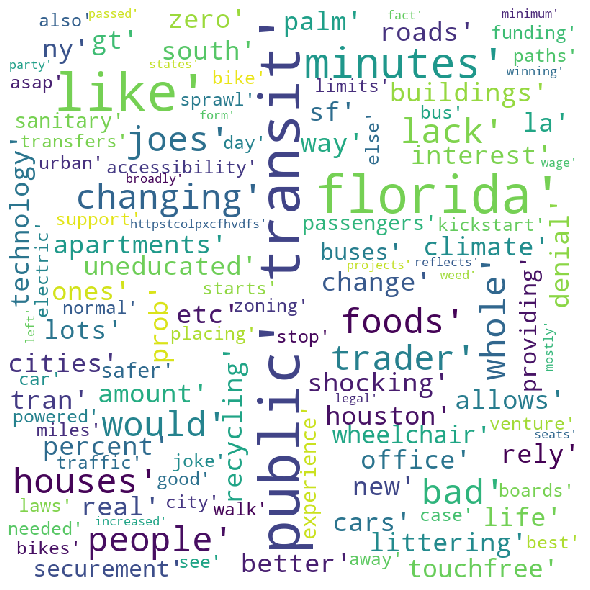

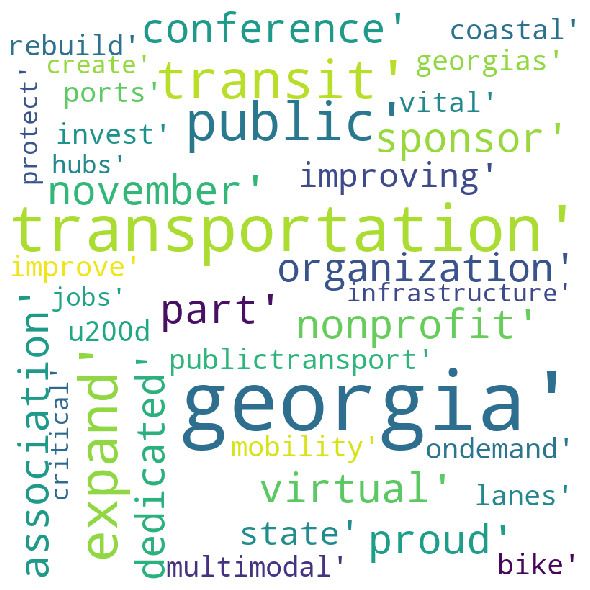

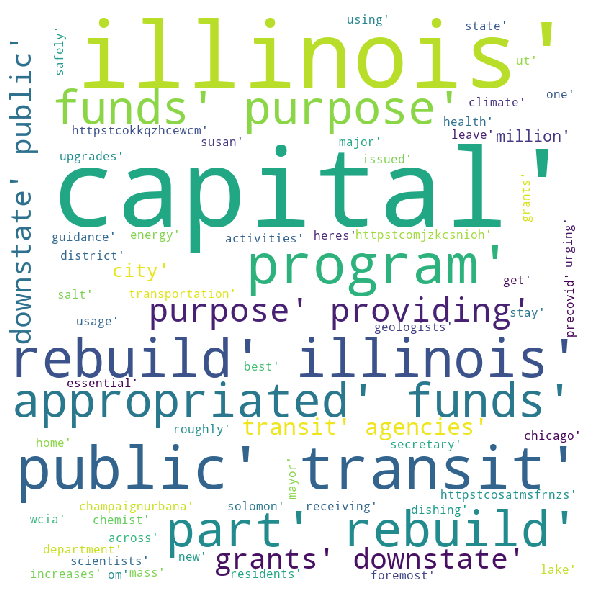

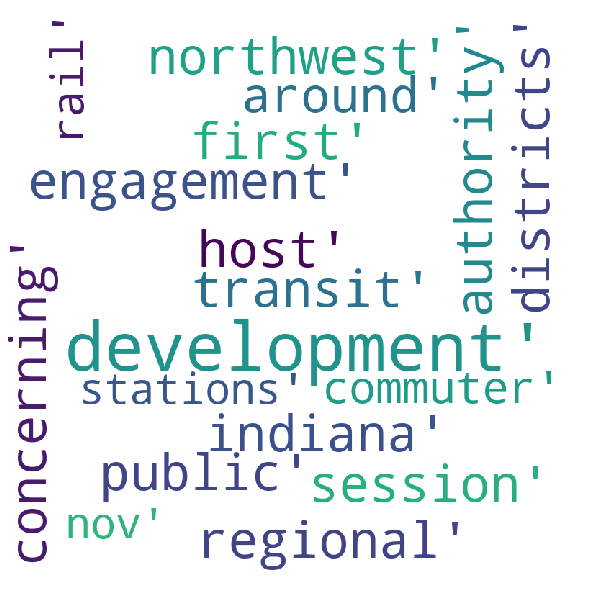

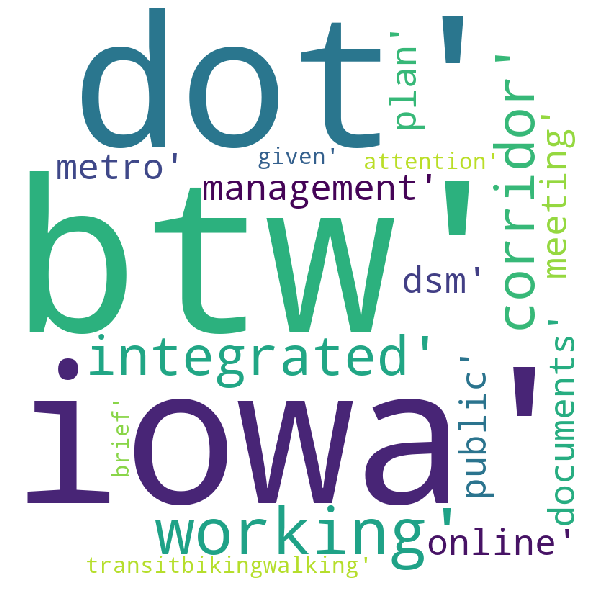

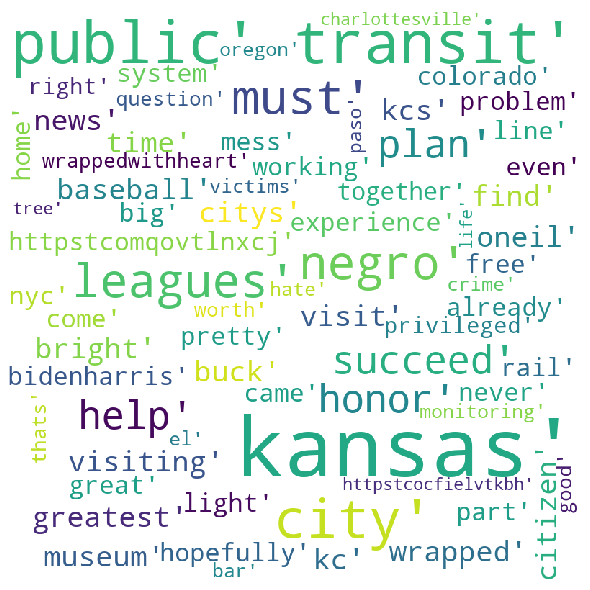

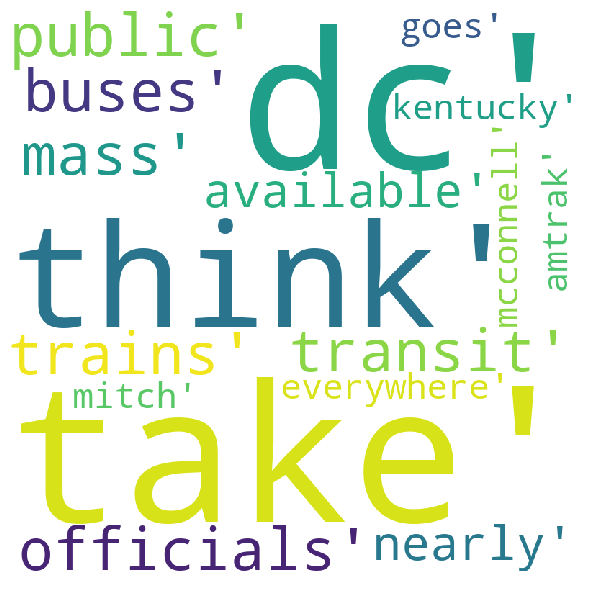

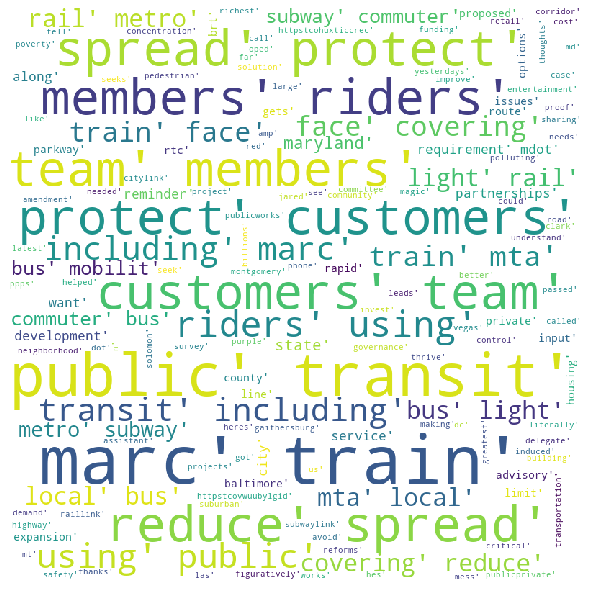

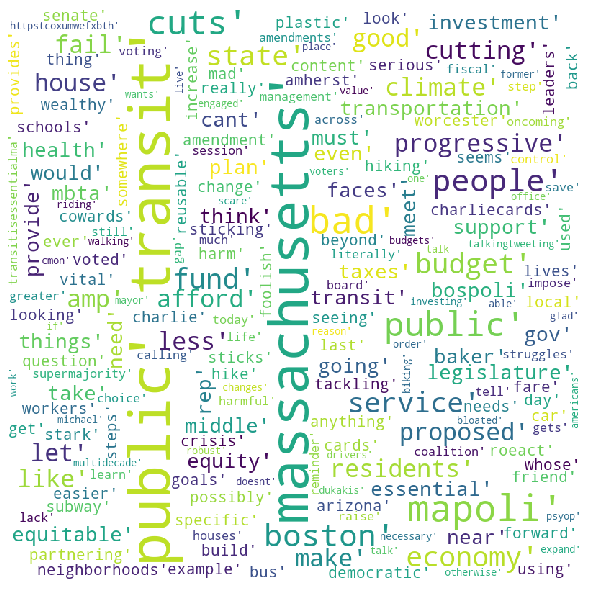

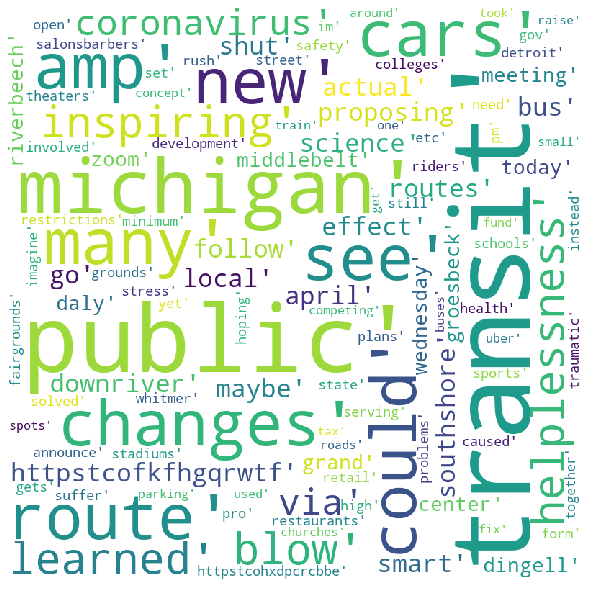

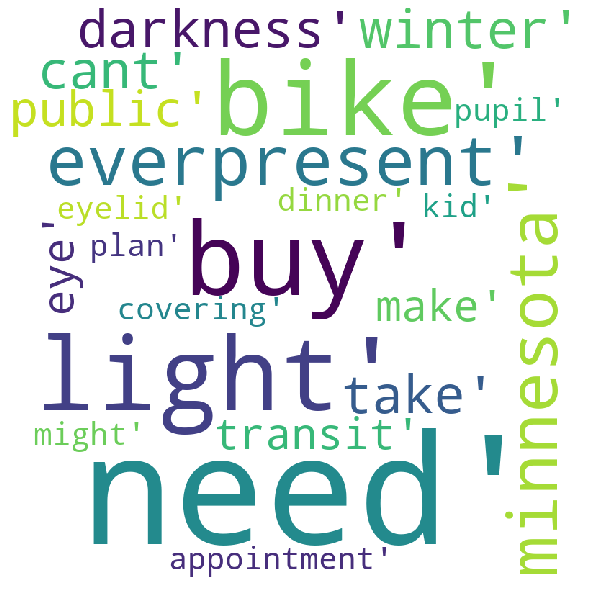

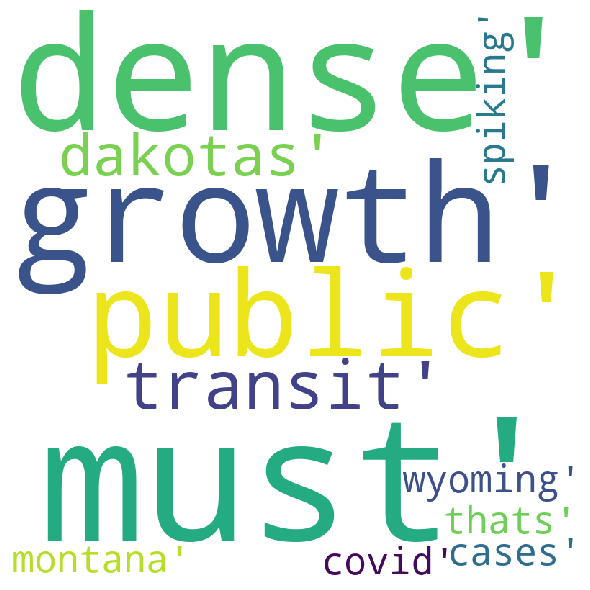

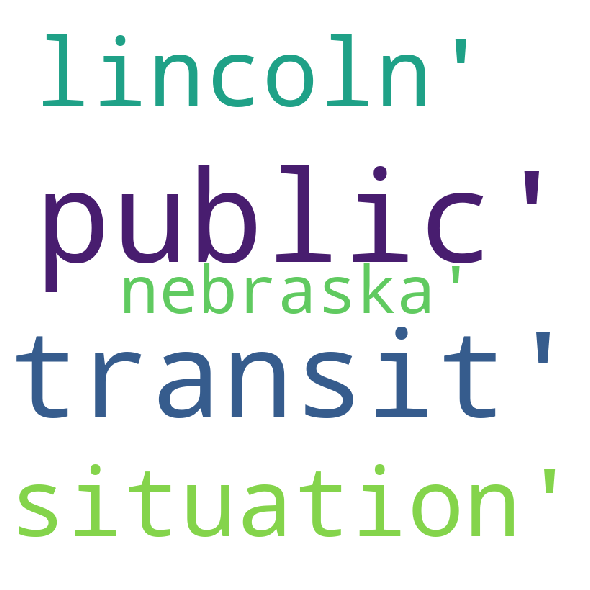

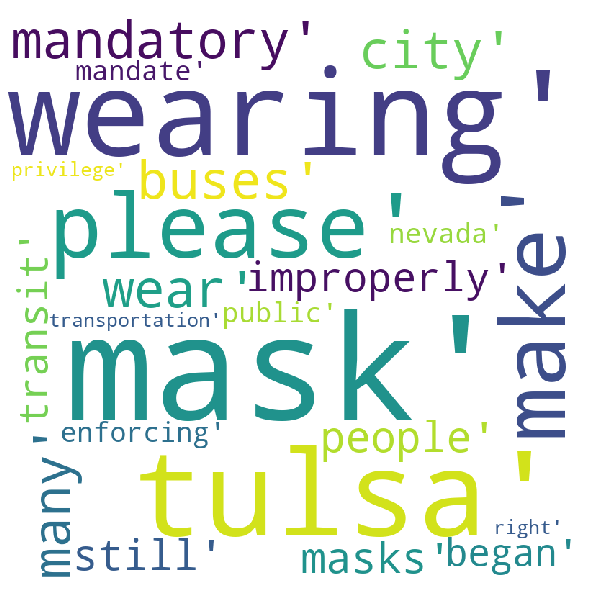

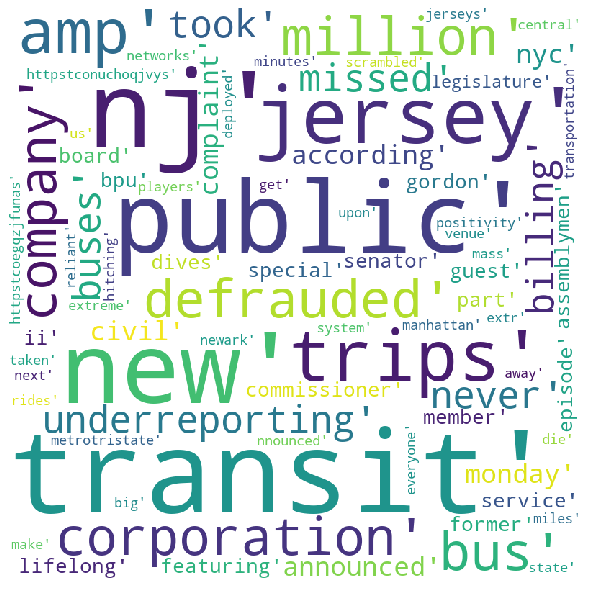

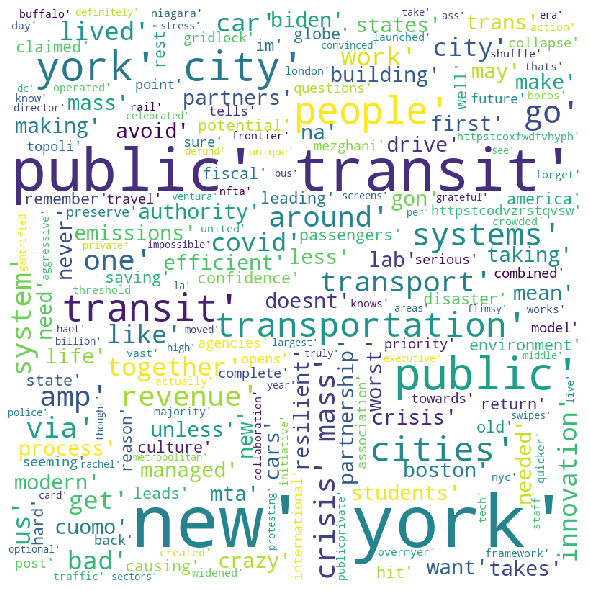

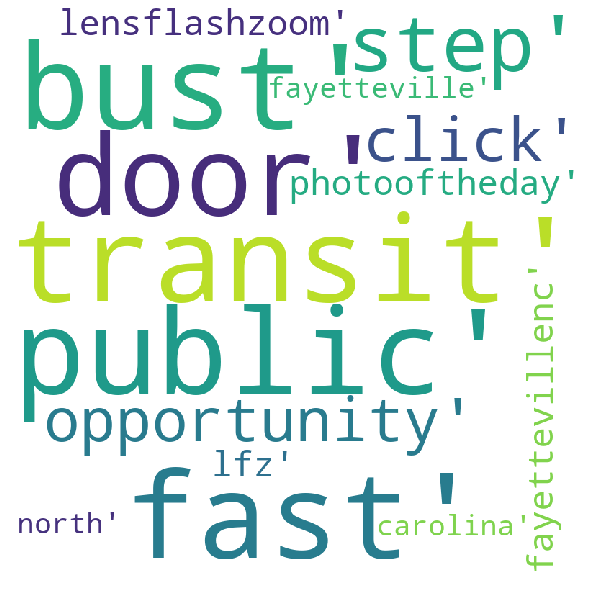

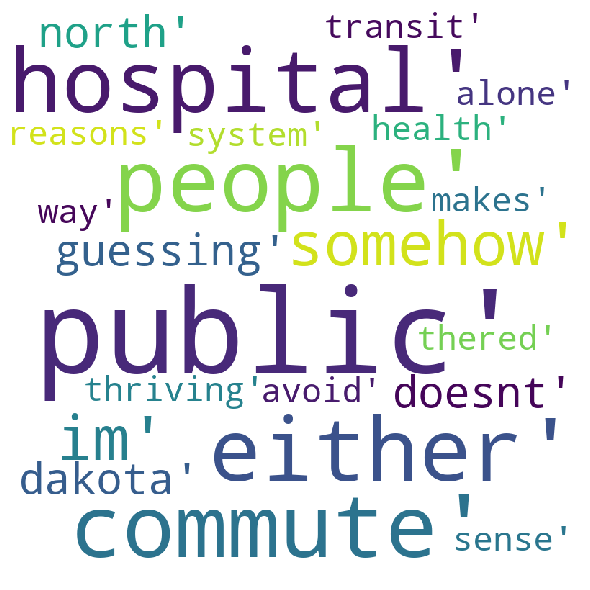

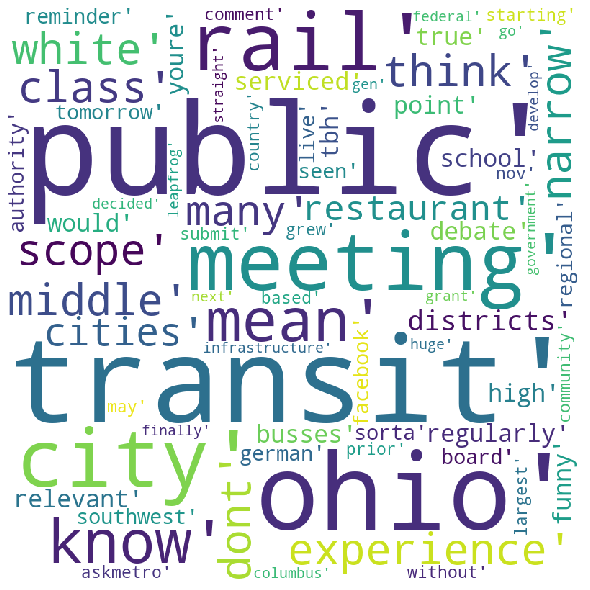

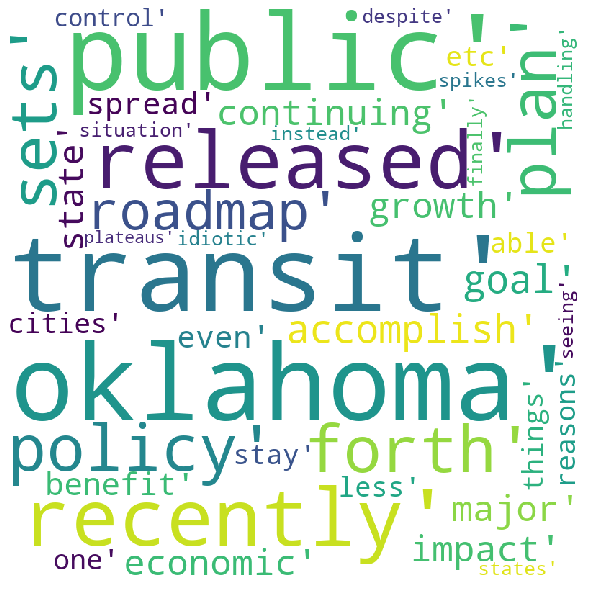

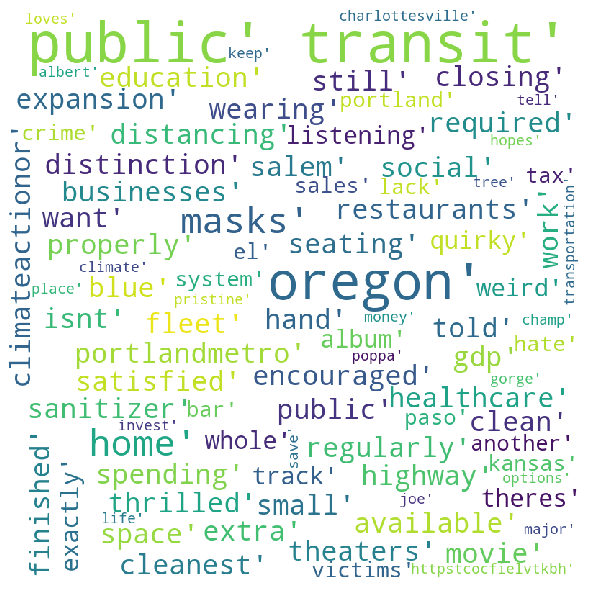

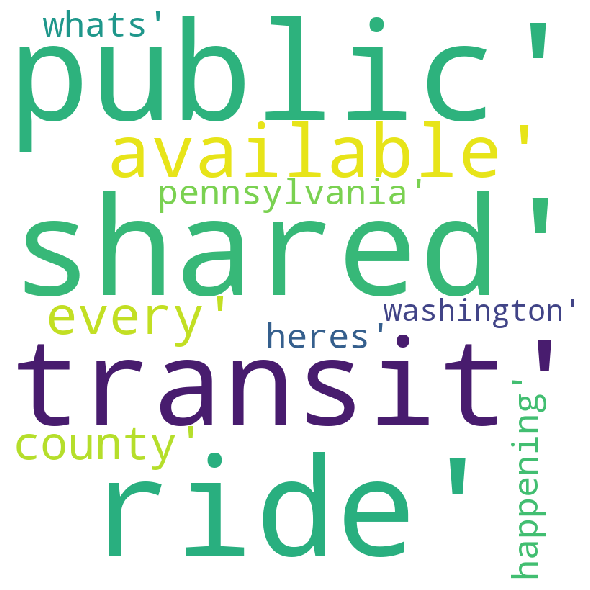

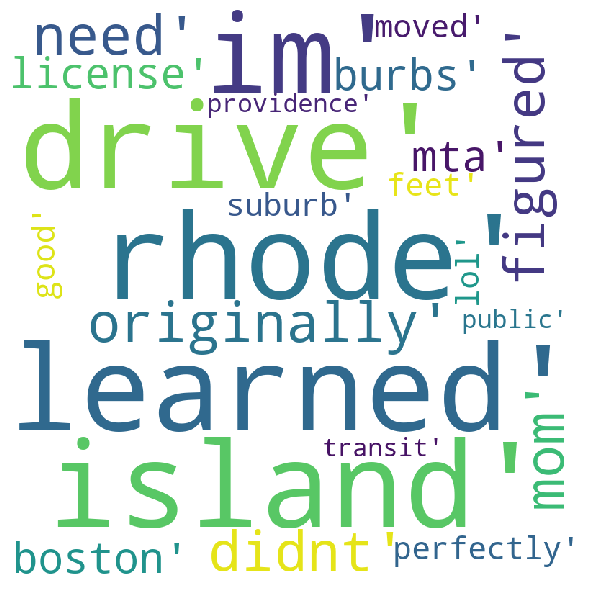

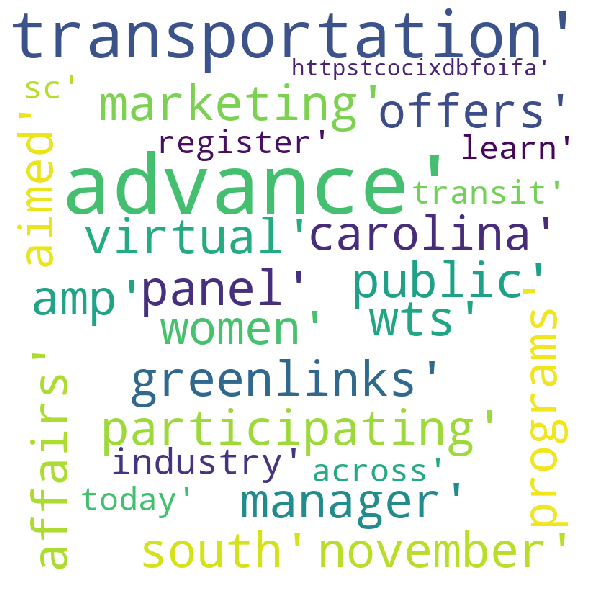

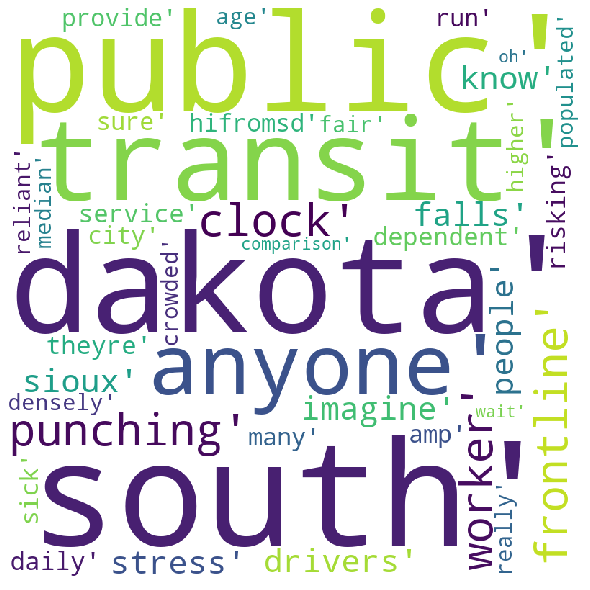

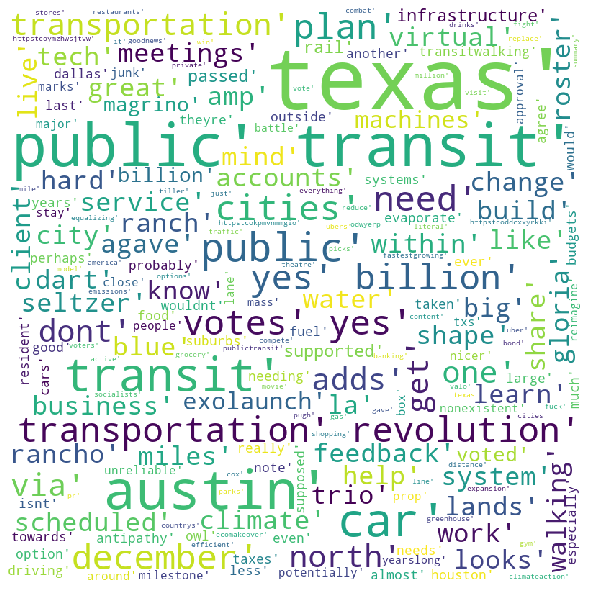

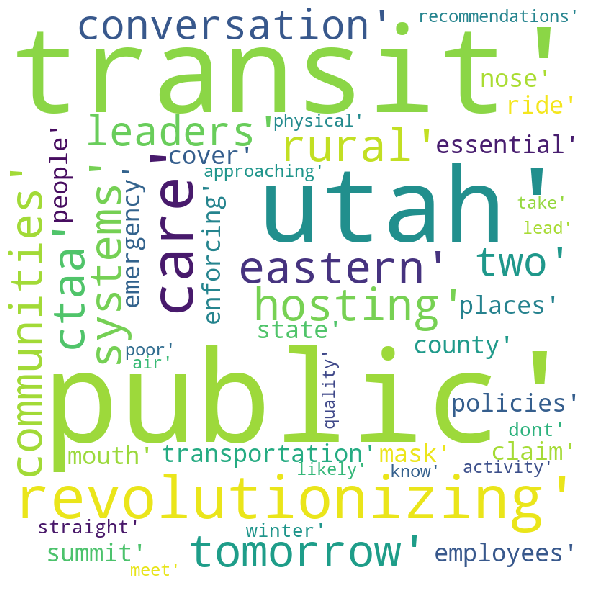

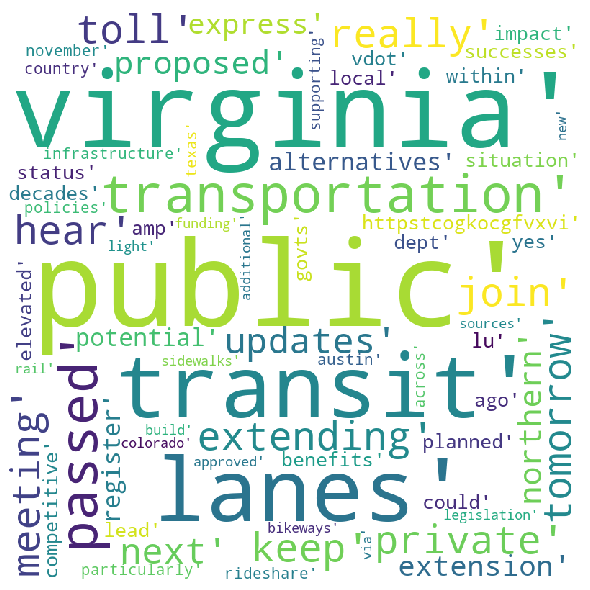

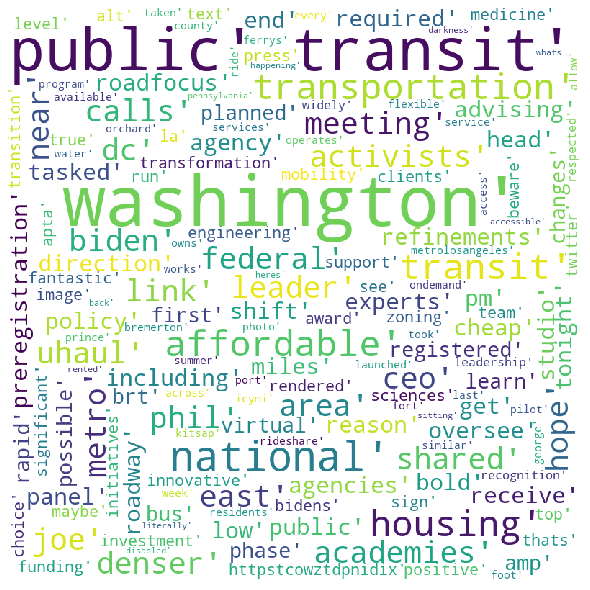

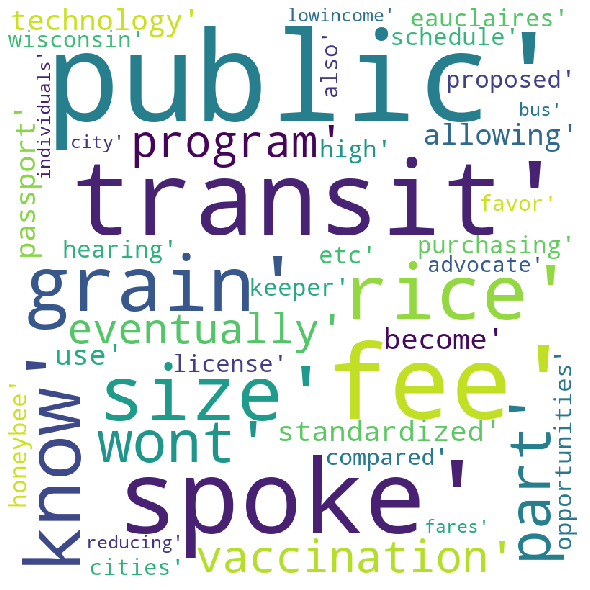

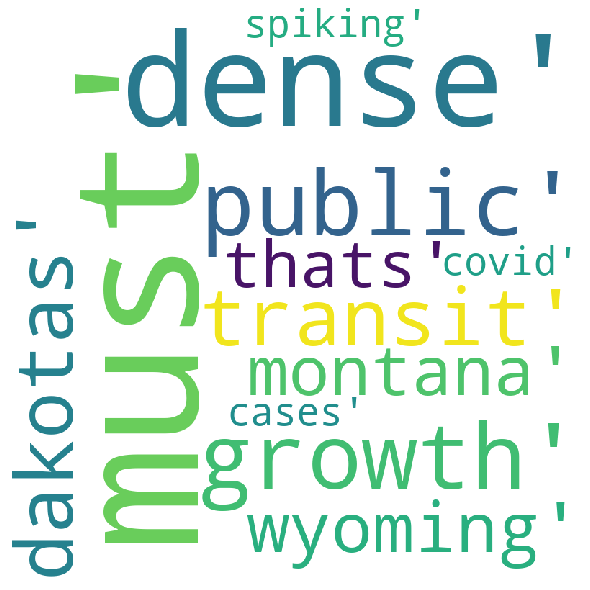

In [14]:
# #try making a bunch of wordclouds? 
for i in corpus.tweets:
    wordcloud = WordCloud(width = 800, height = 800,\
                      background_color = 'white', \
                     stopwords = stopwords, \
                     min_font_size = 10).generate(i)
    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [10]:
#Try wordcloud
wordcloud = WordCloud(width = 800, height = 800,\
                      background_color = 'white', \
                     stopwords = stopwords, \
                     min_font_size = 10).generate(alabama_test)

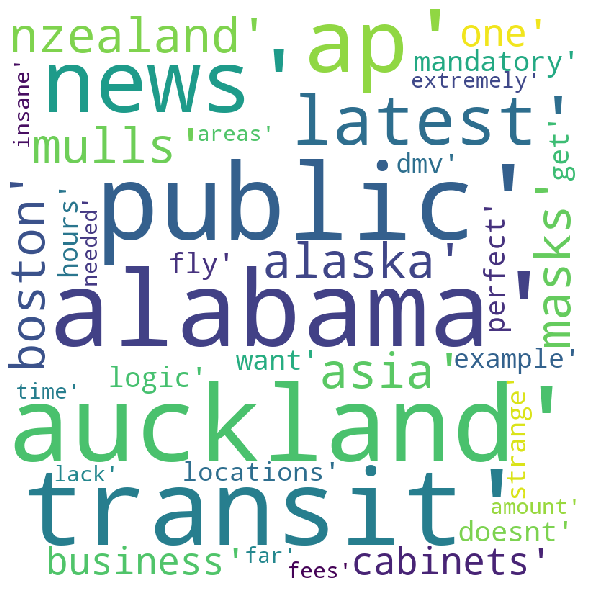

In [11]:
#Plot wordcloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
##EDA w/dtm
state_dtm

state  able  academies  access  accessibility  accessible  \
0          Alabama     0          0       0              0           0   
1           Alaska     0          0       0              0           0   
2          Arizona     0          0       0              0           0   
3         Arkansas     0          0       0              0           0   
4       California     0          0       1              0           0   
5         Colorado     0          0       0              0           0   
6          Florida     0          0       0              1           0   
7          Georgia     0          0       0              0           0   
8         Illinois     0          0       0              0           0   
9          Indiana     0          0       0              0           0   
10            Iowa     0          0       0              0           0   
11          Kansas     0          0       0              0           0   
12        Kentucky     0          0       0              0           0   
13        Maryland     0          0       0              0           0   
14   Massachusetts     1          0       0              0           1   
15        Michigan     0          0       0              0           0   
16       Minnesota     0          0       0              0           0   
17         Montana     0          0       0              0           0   
18        Nebraska     0          0       0              0           0   
19          Nevada     0          0       0              0           0   
20      New Jersey     0          0       0              0           0   
21        New York     0          0       1              0           0   
22  North Carolina     0          0       0              0           0   
23    North Dakota     0          0       0              0           0   
24            Ohio     0          0       0              0           0   
25        Oklahoma     1          0       0              0           0   
26          Oregon     0          0       0              0           0   
27    Pennsylvania     0          0       0              0           0   
28    Rhode Island     0          0       0              0           0   
29  South Carolina     0          0       0              0           0   
30    South Dakota     0          0       0              0           0   
31           Texas     0          0       0              0           0   
32            Utah     0          0       0              0           0   
33        Virginia     0          0       0              0           0   
34      Washington     0          2       1              0           1   
35       Wisconsin     0          0       0              0           0   
36         Wyoming     0          0       0              0           0   

    accomplish  according  accounts  action  ...  years  yearslong  yes  \
0            0          0         0       0  ...      0          0    0   
1            0          0         0       0  ...      0          0    0   
2            0          0         0       0  ...      0          0    0   
3            0          0         0       0  ...      0          0    0   
4            0          0         0       0  ...      0          0    0   
5            0          0         0       0  ...      0          0    0   
6            0          0         0       0  ...      0          0    0   
7            0          0         0       0  ...      0          0    0   
8            0          0         0       0  ...      0          0    0   
9            0          0         0       0  ...      0          0    0   
10           0          0         0       0  ...      0          0    0   
11           0          0         0       0  ...      0          0    0   
12           0          0         0       0  ...      0          0    0   
13           0          0         0       0  ...      0          0    0   
14           0          0         0       0  ...      0          0    0   


In [25]:
unique_list = []
for i in state_dtm.columns:
    uniques = state_dtm['state'].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
# data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
# data_unique_sort = data_words.sort_values(by='unique_words')
# data_unique_sort

In [31]:
alabama = state_dtm.loc[0]

In [34]:
alabama = alabama.to_frame().reset_index()

In [42]:
alabama.columns = ['count']

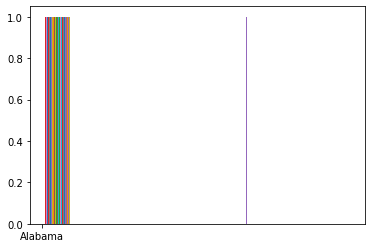

In [45]:
plt.hist(alabama)
plt.show()